# Домашнее задание. Библиотека sklearn и классификация с помощью KNN

## Описание домашнего задания

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
# !gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
# !gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from numpy.typing import ArrayLike, NDArray

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/relicks/dls-2024-1/refs/heads/main/data/hw_4_2/"

In [4]:
data = pd.read_csv(DATA_PATH + "game_of_thrones_train.csv", index_col="S.No")

In [5]:
data.head(3)

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   DateoFdeath       307 non-null    float64
 6   mother            18 non-null     object 
 7   father            22 non-null     object 
 8   heir              21 non-null     object 
 9   house             1176 non-null   object 
 10  spouse            200 non-null    object 
 11  book1             1557 non-null   int64  
 12  book2             1557 non-null   int64  
 13  book3             1557 non-null   int64  
 14  book4             1557 non-null   int64  
 15  book5             1557 non-null   int64  
 16  isAliveMother     18 non-null     float64
 17  

In [7]:
data.isna().sum().sort_values(ascending=False)

mother              1539
isAliveMother       1539
isAliveHeir         1536
heir                1536
isAliveFather       1535
father              1535
isAliveSpouse       1357
spouse              1357
dateOfBirth         1278
age                 1278
DateoFdeath         1250
culture             1069
title                840
house                381
isNoble                0
isMarried              0
numDeadRelations       0
popularity             0
name                   0
book3                  0
book5                  0
book4                  0
book2                  0
book1                  0
male                   0
isAlive                0
dtype: int64

> Оставим только те признаки, у которых количество пропусков меньше 50%. `name` можно также удалить, так как его предиктивная способность сомнительна.

In [8]:
sel_feats = [
    "book1",
    "book2",
    "book3",
    "book4",
    "book5",
    "house",
    "isMarried",
    "isNoble",
    "male",
    "numDeadRelations",
    "popularity",
    "isAlive",
]

In [9]:
data.loc[:, sel_feats].head()

,book1,book2,book3,book4,book5,house,isMarried,isNoble,male,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,
1,0,0,0,0,0,NaN,0,0,1,11,0.605351,0
2,1,1,1,1,1,House Frey,1,1,1,1,0.896321,1
3,0,0,0,1,0,House Swyft,0,1,1,0,0.267559,1
4,0,0,0,0,0,House Arryn,1,1,0,0,0.183946,0
5,0,0,0,1,0,House Santagar,1,1,0,0,0.043478,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [10]:
dataset = data.loc[:, sel_feats].assign(
    isPopular=data.loc[:, "popularity"].map(lambda val: val > 0.5),
    boolDeadRelations=data.loc[:, "numDeadRelations"].map(lambda val: val > 0),
)

In [11]:
dataset.head()

,book1,book2,book3,book4,book5,house,isMarried,isNoble,male,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,0,0,0,0,0,NaN,0,0,1,11,0.605351,0,True,True
2,1,1,1,1,1,House Frey,1,1,1,1,0.896321,1,True,True
3,0,0,0,1,0,House Swyft,0,1,1,0,0.267559,1,False,False
4,0,0,0,0,0,House Arryn,1,1,0,0,0.183946,0,False,False
5,0,0,0,1,0,House Santagar,1,1,0,0,0.043478,1,False,False


In [12]:
# Подсказка
cult = {
    "Summer Islands": ["summer islands", "summer islander", "summer isles"],
    "Ghiscari": ["ghiscari", "ghiscaricari", "ghis"],
    "Asshai": ["asshai'i", "asshai"],
    "Lysene": ["lysene", "lyseni"],
    "Andal": ["andal", "andals"],
    "Braavosi": ["braavosi", "braavos"],
    "Dornish": ["dornishmen", "dorne", "dornish"],
    "Myrish": ["myr", "myrish", "myrmen"],
    "Westermen": ["westermen", "westerman", "westerlands"],
    "Westerosi": ["westeros", "westerosi"],
    "Stormlander": ["stormlands", "stormlander"],
    "Norvoshi": ["norvos", "norvoshi"],
    "Northmen": ["the north", "northmen"],
    "Free Folk": ["wildling", "first men", "free folk"],
    "Qartheen": ["qartheen", "qarth"],
    "Reach": ["the reach", "reach", "reachmen"],
}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [13]:
# data.drop(columns=[...], inplace = True)

In [14]:
dataset.drop(["house", "isAlive"], axis=1).corr()

,book1,book2,book3,book4,book5,isMarried,isNoble,male,numDeadRelations,popularity,isPopular,boolDeadRelations
book1,1.000000,0.278116,0.145458,-0.009461,0.180542,0.018072,0.041593,0.050526,0.082526,0.186818,0.074789,0.139291
book2,0.278116,1.000000,0.380968,0.102247,0.135720,0.153332,-0.033216,0.024079,-0.004477,0.150816,0.001636,0.055850
book3,0.145458,0.380968,1.000000,0.329153,0.226547,0.165407,0.007279,-0.008100,-0.025633,0.140993,-0.026356,0.032889
book4,-0.009461,0.102247,0.329153,1.000000,0.302338,0.141145,0.047394,-0.101674,-0.072370,0.038810,-0.061401,-0.024038
book5,0.180542,0.135720,0.226547,0.302338,1.000000,0.065210,0.069338,0.023022,0.032609,0.089715,0.000907,0.094381
isMarried,0.018072,0.153332,0.165407,0.141145,0.065210,1.000000,0.132037,-0.094385,0.133491,0.241898,0.022525,0.197150
isNoble,0.041593,-0.033216,0.007279,0.047394,0.069338,0.132037,1.000000,0.133807,0.024066,0.059233,-0.038279,0.054631
male,0.050526,0.024079,-0.008100,-0.101674,0.023022,-0.094385,0.133807,1.000000,0.027506,0.113342,0.080518,0.039540
numDeadRelations,0.082526,-0.004477,-0.025633,-0.072370,0.032609,0.133491,0.024066,0.027506,1.000000,0.613759,0.626712,0.781579
popularity,0.186818,0.150816,0.140993,0.038810,0.089715,0.241898,0.059233,0.113342,0.613759,1.000000,0.820775,0.586013


<Axes: >

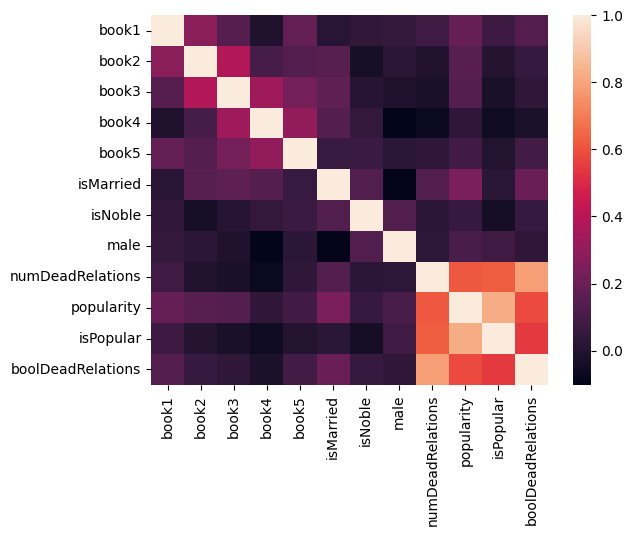

In [15]:
sns.heatmap(dataset.drop(["house", "isAlive"], axis=1).corr())

In [23]:
from numpy.typing import ArrayLike, NDArray
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [35]:
def feature_importance_forest(
    X: ArrayLike, y: ArrayLike, feature_names
) -> tuple[pd.Series, NDArray[np.floating]]:
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X, y)

    importances = forest.feature_importances_
    forest_importances = pd.Series(importances, index=feature_names)
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

    return forest_importances, std


def ols_summary(dataset):
    X = dataset.drop(["house", "isAlive"], axis=1)
    y = dataset.loc[:, "isAlive"]

    # Convert boolean columns to integers
    X["isPopular"] = X["isPopular"].astype(int)
    X["boolDeadRelations"] = X["boolDeadRelations"].astype(int)

    ols = sm.OLS(y, sm.add_constant(X))
    result = ols.fit()
    return result.summary()

In [36]:
X = dataset.drop(["house", "isAlive"], axis=1)
y = dataset.loc[:, "isAlive"]

In [37]:
ols_summary(dataset)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     24.93
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.14e-51
Time:                        13:46:52   Log-Likelihood:                -703.23
No. Observations:                1557   AIC:                             1432.
Df Residuals:                    1544   BIC:                             1502.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7757      0.022     35.871      0.000       0.733       0.818
book1                -0.0558      0.030     -1.847      0.065      -0.115       0.003
book2                -0.0193      0.023     -0.825      0.409      -0.065       0.027
book3                -0.0197      0.023     -0.864      0.388      -0.064       0.025
book4                 0.2535      0.022     11.643      0.000       0.211       0.296
book5                -0.0073      0.022     -0.328      0.743      -0.051       0.036
isMarried            -0.0113      0.032     -0.349      0.727      -0.075       0.052
isNoble              -0.0262      0.020     -1.300      0.194      -0.066       0.013
male                 -0.0800      0.020     -3.928      0.000      -0.120      -0.040
numDeadRelations     -0.0485      0.015     -3.186      0.001      -0.078      -0.019
popularity           -0.8978      0.167     -5.367      0.000      -1.226      -0.570
isPopular             0.6847      0.149      4.607      0.000       0.393       0.976
boolDeadRelations    -0.0329      0.078     -0.421      0.674      -0.186       0.121
==============================================================================
Omnibus:                      213.147   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.086
Skew:                          -1.093   Prob(JB):                     4.63e-68
Kurtosis:                       3.072   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Из t-статистики из отчёта выше видно, что некоторые признаки имеют низкую предсказательную важность.
>> - `book2`
>> - `book3`
>> - `book5`
>> - `isMarried`
>> - `isNoble`
>> - `boolDeadRelations`

In [24]:
forest_importances, std = feature_importance_forest(X, y, X.columns)

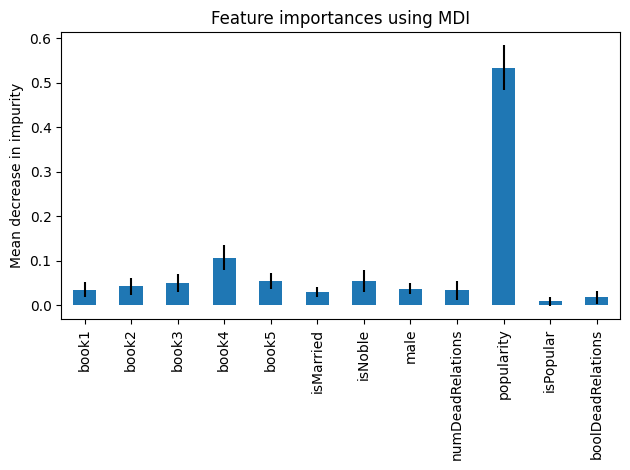

In [19]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [20]:
from sklearn.inspection import permutation_importance

forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

result = permutation_importance(
    forest, X, y, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result["importances_mean"], index=X.columns)

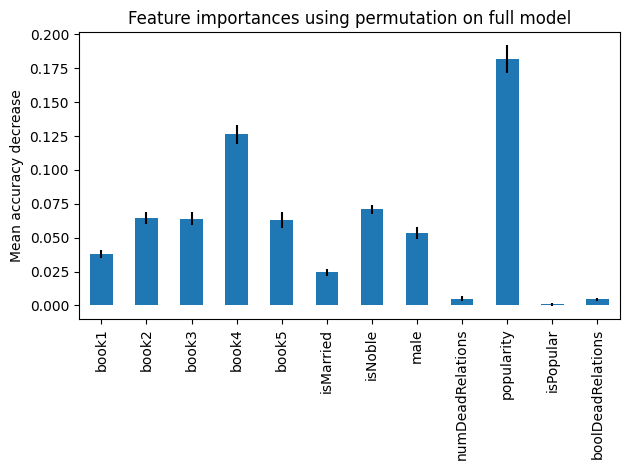

In [21]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result["importances_std"], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [22]:
dataset.columns

Index(['book1', 'book2', 'book3', 'book4', 'book5', 'house', 'isMarried',
       'isNoble', 'male', 'numDeadRelations', 'popularity', 'isAlive',
       'isPopular', 'boolDeadRelations'],
      dtype='object')

> Как видно из графика, приведённого выше, такие признаки, как `numDeadRelations`, 
> `boolDeadRelations` и `isPopular` слабо влияют на предсказательную точность.
> Следовательно, их можно удалить.

> Тогда, выбранные признаки таковы:

In [ ]:
selected_features = [
    "book1",
    "book2",
    "book3",
    "book4",
    "book5",
    "house",
    "isMarried",
    "isNoble",
    "male",
    "popularity",
    "isAlive",
]

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = # ...
y = # ...

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = # ...

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.34MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)